In [194]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
from docxtpl import DocxTemplate,InlineImage

# writing data in each table
doc = DocxTemplate
# Define the directory to save the figures
save_dir = "C:/Users/Admins/Documents/GitHub/mhl-ma-report/sections/Zabbix/Image"

# Ensure the directory exists, create it if necessary
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# import data from GG Sheet

In [195]:
## original data https://docs.google.com/spreadsheets/d/14GmNx-6YkTfOSYfjQqGw-wC6h9VPqB3frw-ovtMTN5A/edit?pli=1#gid=0

In [196]:
## sheet สถานภาพเครื่องแม่ข่าย_และอุปกรณ์ต่อพ่วง_PoPNix owner P'Pooooo

SHEET_ID = '14GmNx-6YkTfOSYfjQqGw-wC6h9VPqB3frw-ovtMTN5A'
SHEET_NAME = 'Jan67'
url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
df = pd.read_csv(url)
df # print(df.head())

,No.,List Devices,Serial Number,Health Check,Clean Check
0,1,Private Cloud 1,9FRQ8F3,False,False
1,2,Private Cloud 2,BFRQ8F3,False,False
2,3,Private Cloud 3,CFRQ8F3,False,False
3,4,Big data Data node 1,DFRQ8F3,False,False
4,5,Big data Data node 2,FFRQ8F3,False,False
5,6,Big data Data node 3,GFRQ8F3,False,False
6,7,Frontend server1,DK0V8F3,False,False
7,8,Frontend server2,8GLRDT3,False,False
8,9,Backup Server,GGRQ8F3,False,False
9,10,Network L3 Switch 1,HPP363,False,False


In [197]:
lst_serial = df['Serial Number']
lst_serial

0             9FRQ8F3
1             BFRQ8F3
2             CFRQ8F3
3             DFRQ8F3
4             FFRQ8F3
5             GFRQ8F3
6             DK0V8F3
7             8GLRDT3
8             GGRQ8F3
9              HPP363
10            CHSP363
11            7DDQ363
12    A291427X1705308
13    A291427X1705312
Name: Serial Number, dtype: object

In [198]:
lst_device = df['List Devices']
lst_device

0            Private Cloud 1
1            Private Cloud 2
2            Private Cloud 3
3       Big data Data node 1
4       Big data Data node 2
5       Big data Data node 3
6           Frontend server1
7           Frontend server2
8              Backup Server
9        Network L3 Switch 1
10       Network L3 Switch 2
11         Network L2 Switch
12    Deep Learning Server 1
13    Deep Learning Server 2
Name: List Devices, dtype: object

In [199]:
lst_health = df['Health Check']
lst_health

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
Name: Health Check, dtype: bool

In [200]:
lst_clean = df['Clean Check']
lst_clean

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
Name: Clean Check, dtype: bool

In [201]:
lst_clean[1]

False

In [202]:
status = df['Health Check'][1]
status

False

# Print figure for Health Check

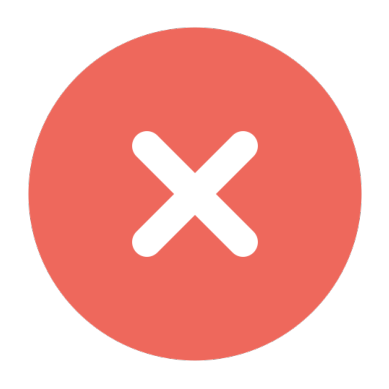

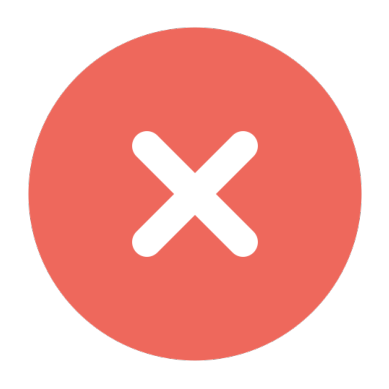

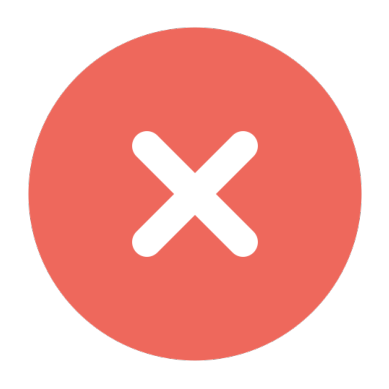

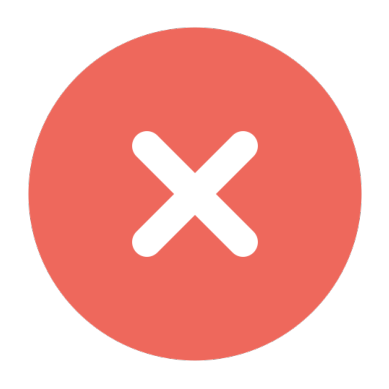

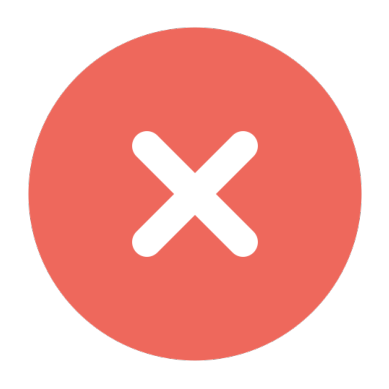

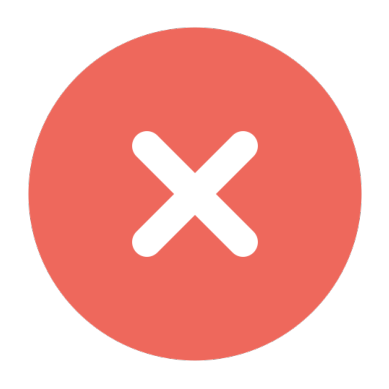

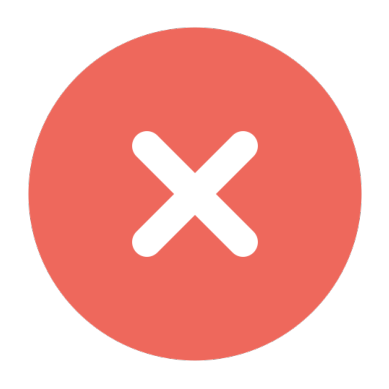

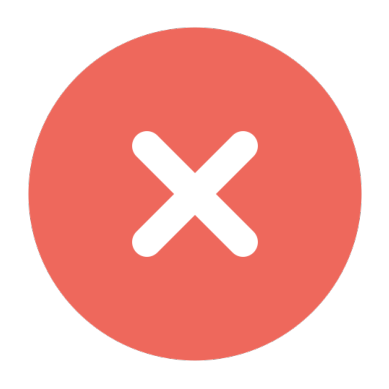

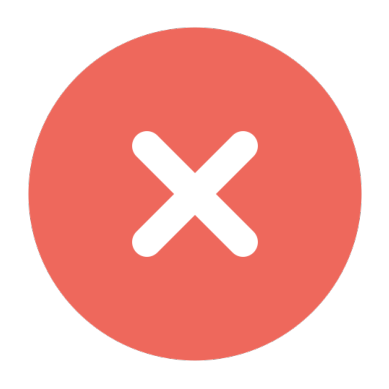

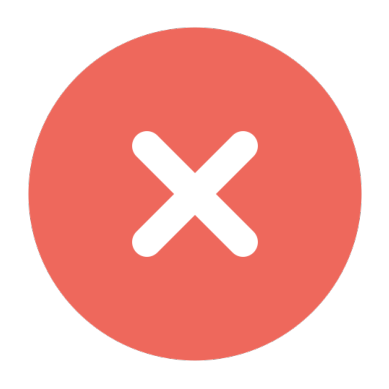

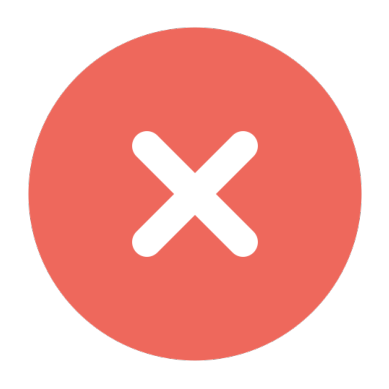

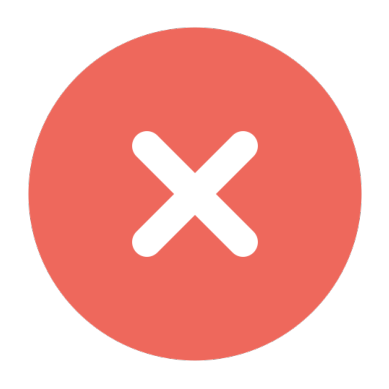

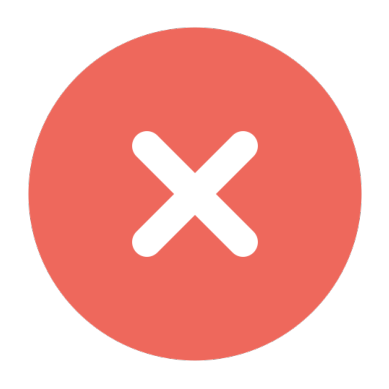

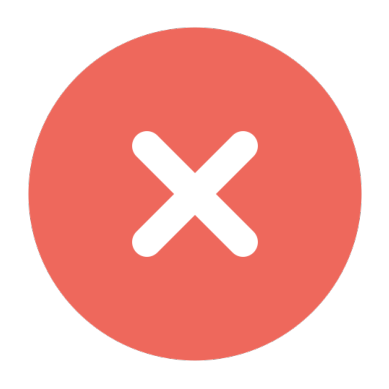

In [203]:
# Replace 'path/to/your/image.jpg' with the actual path to your image file
# image_pass =  './sections/Zabbix/Image/pass.png'
# image_not_pass =  './sections/Zabbix/Image/not_pass.png'
image_pass =  'C:/Users/Admins/Documents/GitHub/mhl-ma-report/sections/Zabbix/Image/pass.png'
image_not_pass =  'C:/Users/Admins/Documents/GitHub/mhl-ma-report/sections/Zabbix/Image/not_pass.png'

# Open the image using Pillow
img_pass = Image.open(image_pass)
img_not_pass = Image.open(image_not_pass)

def show_img(status):
    if status == True:
        img = img_pass
    else: img = img_not_pass
    return img

health_check = []


# Display  figures using a for loop
for i in range(len(lst_health)):  # Display at most 10 figures
    img_health = show_img(lst_health[i])
    
    # Print lst_device and lst_serial for each device
    # print(f"Device: {lst_device[i]}, Serial: {lst_serial[i]}")
    device_name = lst_device[i]
    serial_number = lst_serial[i]
    plt.figure()  # Create a new figure
    plt.imshow(img_health)
    plt.axis('off')  # Turn off axis labels

     # Save the plot
    image_health_check = f'health_check_{device_name}.png'
    plt.savefig(os.path.join(save_dir,image_health_check))

    img_clean = show_img(lst_clean[i])
    plt.figure()  # Create a new figure
    plt.imshow(img_clean)
    plt.axis('off')  # Turn off axis labels
    image_clean_check = f'clean_check_{device_name}.png'
    plt.savefig(os.path.join(save_dir,image_clean_check))

    plt.close()  # Close the plot to avoid overlapping when iterating over multiple datasets

     # Append the values to disk_space list
    health_check.append({
        'device_name' : device_name,
        'serial_number': serial_number, 
        'image_health_check': InlineImage(doc,f"{image_health_check}"),
        'image_clean_check': InlineImage(doc,f"{image_clean_check}")
    })

# # Show all figures
# plt.show()

In [204]:
health_check[1]

{'device_name': 'Private Cloud 2',
 'serial_number': 'BFRQ8F3',
 'image_health_check': <docxtpl.inline_image.InlineImage at 0x19963e01c10>,
 'image_clean_check': <docxtpl.inline_image.InlineImage at 0x19963d9e310>}

In [205]:
# .ipynb -> .py
!jupyter nbconvert --to script health_check.ipynb

[NbConvertApp] Converting notebook health_check.ipynb to script
[NbConvertApp] Writing 3192 bytes to health_check.py
